    Τμήμα Πληροφορικής και Τηλεπικοινωνιών - Άρτα 
    Πανεπιστήμιο Ιωαννίνων 

    Γκόγκος Χρήστος 
    http://chgogos.github.io/
    
    Τελευταία ενημέρωση: 1/3/2022

# Pandas



In [2]:
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

## Series

Πρόκειται για μονοδιάστατες σειρές δεδομένων, ένας πίνακας δεδομένων μαζί με ένα πίνακα ετικετών (δεικτών)

In [3]:
s1 = Series([1, 2, 3, 4, 5])
print(s1)
print("#" * 40)
print(s1.values)
print("#" * 40)
print(s1.index)


0    1
1    2
2    3
3    4
4    5
dtype: int64
########################################
[1 2 3 4 5]
########################################
RangeIndex(start=0, stop=5, step=1)


In [4]:
# ορισμός custom δεικτών αντί για 0,1,2,...

# απευθείας
s2 = Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
print(s2)


a    1
b    2
c    3
d    4
e    5
dtype: int64


In [5]:
# προσπέλαση στοιχείων με δείκτες και custom δείκτες

print(s2[0]) 
print("#" * 40)
print(s2[0:3])
print("#" * 40)
print(s2['a'])
print("#" * 40)
print(s2[['a','e']]) 
print("#" * 40)
print(s2['b':'e'])

1
########################################
a    1
b    2
c    3
dtype: int64
########################################
1
########################################
a    1
e    5
dtype: int64
########################################
b    2
c    3
d    4
e    5
dtype: int64


In [6]:
# συναρτήσεις στατιστικής

print(s2)
print("#" * 40)
print('max', s2.max())
print('min', s2.min())
print('mean', s2.mean())
print('median', s2.median())
print('count', s2.count())

a    1
b    2
c    3
d    4
e    5
dtype: int64
########################################
max 5
min 1
mean 3.0
median 3.0
count 5


In [7]:
# δημιουργία Series από λεξικό

a_dict = {
    "nikos": 10,
    "maria": 9,
    "petros": 4
}

s3 = Series(a_dict)
print(s3)

print("#" * 40)

# ανάθεση ονόματος στη σειρά και ονόματος στο δείκτη της σειράς
s3.name = "grades"
s3.index.name = "name"
print(s3)

nikos     10
maria      9
petros     4
dtype: int64
########################################
name
nikos     10
maria      9
petros     4
Name: grades, dtype: int64


In [8]:
# επαναδεικτοδότηση σε σειρές

np.random.seed(1234)
s4 = Series(np.random.randn(5), index = ['a','b','c','d', 'e'])
print(s4)
print("#" * 40)
s4 = s4.reindex(['a','b','c','d', 'e','f','g'])
print(s4)
print("#" * 40)
s4 = s4.reindex(['a','b','c','d', 'e','f','g','h','i'], fill_value=-1)
print(s4)
print("#" * 40)

a    0.471435
b   -1.190976
c    1.432707
d   -0.312652
e   -0.720589
dtype: float64
########################################
a    0.471435
b   -1.190976
c    1.432707
d   -0.312652
e   -0.720589
f         NaN
g         NaN
dtype: float64
########################################
a    0.471435
b   -1.190976
c    1.432707
d   -0.312652
e   -0.720589
f         NaN
g         NaN
h   -1.000000
i   -1.000000
dtype: float64
########################################


In [9]:
# Διαγραφή στοιχείων από σειρά

s4 = s4.drop(['f','g'])
print(s4)

a    0.471435
b   -1.190976
c    1.432707
d   -0.312652
e   -0.720589
h   -1.000000
i   -1.000000
dtype: float64


## DataFrames

Τα DataFrames είναι δομές δεδομένων σε μορφή πίνακα. Περιέχουν μια διατεταγμένη λίστα στηλών με κάθε στήλη να μπορεί να έχει διαφορετικό τύπο δεδομένων. Επίσης, διαθέτει δείκτες τόσο για τις στήλες όσο και για τις γραμμές του πίνακα.

In [10]:
# Δημιουργία DataFrame (α' τρόπος από μια λίστα με λίστες)

data = [["nikos", 10, 0], ["maria", 9, 4], ["petros", 4, 2]]

df_grades = DataFrame(data, columns=['name', 'grade', 'absences'])
print(df_grades)


     name  grade  absences
0   nikos     10         0
1   maria      9         4
2  petros      4         2


In [11]:
# Δημιουργία DataFrame (β' τρόπος από λεξικό)
# Τα κλειδία του λεξικού αποτελούν τις στήλες του DataFrame,
# πρέπει να περιέχουν ως values λίστες με ίδιο πλήθος στοιχείων

data = {
    "name": ["nikos", "maria", "petros"],
    "grade": [10, 9, 4],
    "absences": [0, 1, 2],
}
df_grades = DataFrame(data)
print(df_grades)

     name  grade  absences
0   nikos     10         0
1   maria      9         1
2  petros      4         2


In [12]:
# αλλαγή σειράς στηλών, προσθήκη νέας στήλης

df_grades2 = DataFrame(data, columns = ['name', 'absences', 'grade', 'semester'])
print(df_grades2)

     name  absences  grade semester
0   nikos         0     10      NaN
1   maria         1      9      NaN
2  petros         2      4      NaN


In [13]:
# ορισμός custom δεικτών γραμμών

df_grades3 = DataFrame(data, index=[1234, 1235, 1236])
print(df_grades3)

        name  grade  absences
1234   nikos     10         0
1235   maria      9         1
1236  petros      4         2


In [41]:
# ορισμός υπάρχουσας στήλης ως index
df_grades4 = df_grades2.set_index("name")
print(df_grades4)

        absences  grade semester
name                            
nikos          0     10      NaN
maria          1      9      NaN
petros         2      4      NaN


In [15]:
# ορισμός κλειδιών λεξικού ως δεικτών γραμμών

df_grades4 = DataFrame(data, columns=['grade', 'absences'], index=data['name'])
print(df_grades4)

        grade  absences
nikos      10         0
maria       9         1
petros      4         2


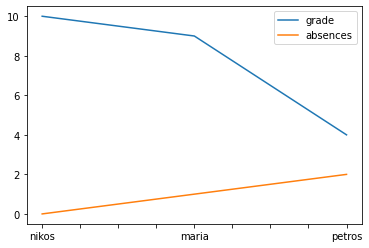

In [16]:
# απευθείας δημιουργία γραφήματος από ένα DataFrame

df_grades4.plot()
plt.show()

In [17]:
# πρόσβαση στα δεδομένα μιας στήλης ως σειρά δεδομένων (με 2 τρόπους)

print(df_grades4["grade"])
print("#" * 40)
print(df_grades4.grade)


nikos     10
maria      9
petros     4
Name: grade, dtype: int64
########################################
nikos     10
maria      9
petros     4
Name: grade, dtype: int64


In [18]:
# ανάκτηση δεδομένων συγκεκριμένης σειράς (row) του DataFrame με loc και iloc

print(df_grades4.loc['nikos'])
print("#" * 40)
print(df_grades4.iloc[0])

grade       10
absences     0
Name: nikos, dtype: int64
########################################
grade       10
absences     0
Name: nikos, dtype: int64


In [19]:
# προσπέλαση στοιχείων

print(df_grades4)
print("#" * 40)
print(df_grades4.loc['maria']) # όλη η γραμμή
print("#" * 40)
print(df_grades4.loc['maria']['grade']) # ένα στοιχείο μιας γραμμής (α' τρόπος)
print("#" * 40)
print(df_grades4.loc['maria','grade']) # ένα στοιχείο μιας γραμμής (β' τρόπος) - πλέον συνηθισμένος
print("#" * 40)
print(df_grades4.loc['maria'][0]) # ένα στοιχείο μιας γραμμής (γ' τρόπος)


        grade  absences
nikos      10         0
maria       9         1
petros      4         2
########################################
grade       9
absences    1
Name: maria, dtype: int64
########################################
9
########################################
9
########################################
9


In [20]:
# αλλαγή τιμών στήλης (όλες οι γραμμές λαμβάνουν την ίδια τιμή)

df_grades4['grade'] = 10
df_grades4

,grade,absences
nikos,10,0
maria,10,1
petros,10,2


In [21]:
# αλλαγή τιμών στήλης 

df_grades4['grade'] = [10,9,5]
df_grades4

,grade,absences
nikos,10,0
maria,9,1
petros,5,2


In [22]:
# προσθήκη νέας στήλης 

df_grades4['semester'] = "unknown"
df_grades4

,grade,absences,semester
nikos,10,0,unknown
maria,9,1,unknown
petros,5,2,unknown


In [23]:
# προσθήκη νέας στήλης ορίζοντας περιεχόμενα ανά γραμμή

df_grades4['semester'] = [1,1,2]
df_grades4

,grade,absences,semester
nikos,10,0,1
maria,9,1,1
petros,5,2,2


In [24]:
# επιλογή συγκεκριμένων στηλών

df_grades4[['absences','semester']] 

,absences,semester
nikos,0,1
maria,1,1
petros,2,2


In [25]:
# διαγραφή γραμμής

df_grades4 = df_grades4.drop('maria')
df_grades4

,grade,absences,semester
nikos,10,0,1
petros,5,2,2


In [26]:
# διαγραφή στηλών 
df_grades4 = df_grades4.drop(['absences', 'semester'], axis=1)
df_grades4

,grade
nikos,10
petros,5


In [27]:
# Στοίχιση (aligning)

df1 = DataFrame(np.arange(12).reshape(4,3), index = ['r1', 'r2', 'r3', 'r4'],  columns = ['a', 'b', 'c'])
df1

,a,b,c
r1,0,1,2
r2,3,4,5
r3,6,7,8
r4,9,10,11


In [28]:
# Mapping (μετατροπή της στήλης name σε κεφαλαία)

df_grades5 = df_grades
df_grades5['name'] = df_grades5['name'].apply(lambda x:x.upper())
df_grades5

,name,grade,absences
0,NIKOS,10,0
1,MARIA,9,1
2,PETROS,4,2


In [29]:
# ταξινόμηση με βάση το index (δείκτες σειρών) σε φθίνουσα σειρά

df_grades5.sort_index(ascending=False)

,name,grade,absences
2,PETROS,4,2
1,MARIA,9,1
0,NIKOS,10,0


In [30]:
# ταξινόμηση με βάση το column (ετικέτες στηλών)

df_grades5.sort_index(axis=1)

,absences,grade,name
0,0,10,NIKOS
1,1,9,MARIA
2,2,4,PETROS


In [31]:
# ταξινόμηση με βάση τα περιεχόμενα στήλης

df_grades5.sort_values('name')

,name,grade,absences
1,MARIA,9,1
0,NIKOS,10,0
2,PETROS,4,2


In [32]:
df_grades5.sort_values(by=['grade','absences'], ascending=[True, False])

,name,grade,absences
2,PETROS,4,2
1,MARIA,9,1
0,NIKOS,10,0


In [33]:
# συναθροιστικές συναρτήσεις

df_grades5[["grade", "absences"]].agg(['min','max','mean','median'])

,grade,absences
min,4.000000,0.0
max,10.000000,2.0
mean,7.666667,1.0
median,9.000000,1.0


In [34]:
# stack

df_grades6 = df_grades5.stack()
df_grades6

0  name         NIKOS
   grade           10
   absences         0
1  name         MARIA
   grade            9
   absences         1
2  name        PETROS
   grade            4
   absences         2
dtype: object

In [35]:
#unstack

df_grades6.unstack()

,name,grade,absences
0,NIKOS,10,0
1,MARIA,9,1
2,PETROS,4,2


## Φόρτωση δεδομένων από αρχεία κειμένου

In [36]:
import pandas as pd
import numpy as np

In [37]:
fn = "../../../datasets/greek_cities.csv"
df = pd.read_csv(fn)
df

,City,Perfecture,Population
0,ΑΘΗΝΑ,ΑΤΤΙΚΗΣ,3218218
1,ΘΕΣΣΑΛΟΝΙΚΗ,ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,789191
2,ΠΑΤΡΑ,ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,168202
3,ΗΡΑΚΛΕΙΟ,ΚΡΗΤΗΣ,153653
4,ΛΑΡΙΣΑ,ΘΕΣΣΑΛΙΑ,144651
5,ΒΟΛΟΣ,ΘΕΣΣΑΛΙΑ,118707
6,ΙΩΑΝΝΙΝΑ,ΗΠΕΙΡΟΣ,65574
7,ΤΡΙΚΑΛΑ,ΘΕΣΣΑΛΙΑ,61653
8,ΧΑΛΚΙΔΑ,ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ,59125
9,ΣΕΡΡΕΣ,ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,58287


In [38]:
# hierarchical indexing

df = pd.read_csv(fn, index_col=['Perfecture','City'])
df

Population
Perfecture           City                   
ΑΤΤΙΚΗΣ              ΑΘΗΝΑ           3218218
ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΘΕΣΣΑΛΟΝΙΚΗ      789191
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ      ΠΑΤΡΑ            168202
ΚΡΗΤΗΣ               ΗΡΑΚΛΕΙΟ         153653
ΘΕΣΣΑΛΙΑ             ΛΑΡΙΣΑ           144651
                     ΒΟΛΟΣ            118707
ΗΠΕΙΡΟΣ              ΙΩΑΝΝΙΝΑ          65574
ΘΕΣΣΑΛΙΑ             ΤΡΙΚΑΛΑ           61653
ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ      ΧΑΛΚΙΔΑ           59125
ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΣΕΡΡΕΣ            58287

In [39]:
df.loc['ΘΕΣΣΑΛΙΑ']

,Population
City,
ΛΑΡΙΣΑ,144651
ΒΟΛΟΣ,118707
ΤΡΙΚΑΛΑ,61653
